<a href="https://colab.research.google.com/github/svetlanama/math/blob/main/%D0%94%D0%978_%D0%9C%D0%BE%D1%96%D1%81%D0%B5%D1%94%D0%BD%D0%BA%D0%BE_%D0%A1%D0%B2%D1%96%D1%82%D0%BB%D0%B0%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D1%96%D0%B2%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акцій у кожний момент часу дорівнює
x
∼
Γ
(
0.3
,
1.1
)
x∼Γ(0.3,1.1), де
Г
Г — позначення гамма-розподілу.



Необхідно запустити симуляцію
n
=
100
n=100 разів для різних значень часу
t
t.

а) Побудуй гістограму розподілу
x
x.

б) Запусти симуляцію з
t
t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.

t=1: mean=0.279, std=0.527, p=0.000


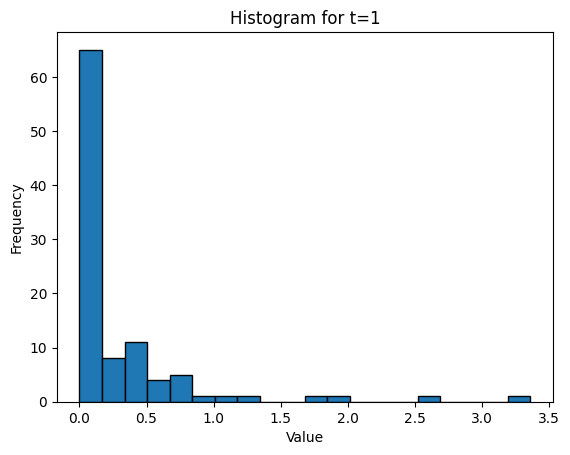

t=10: mean=3.320, std=1.767, p=0.000


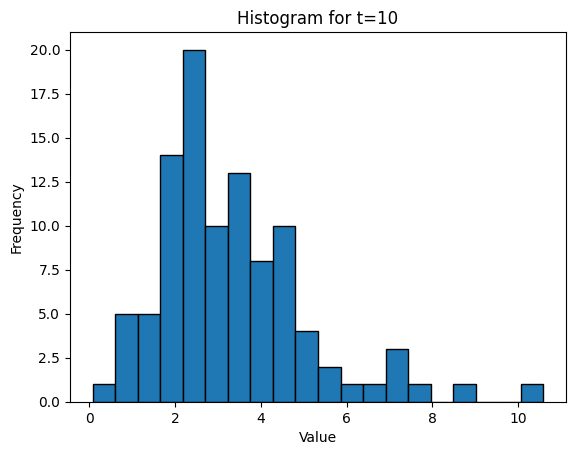

t=30: mean=10.508, std=3.915, p=0.000


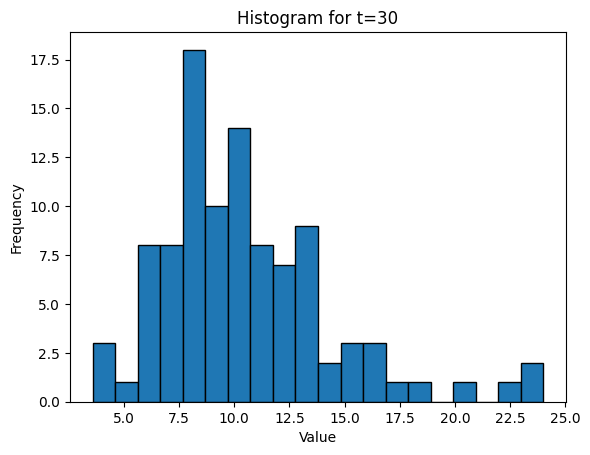

t=60: mean=19.781, std=4.346, p=0.284


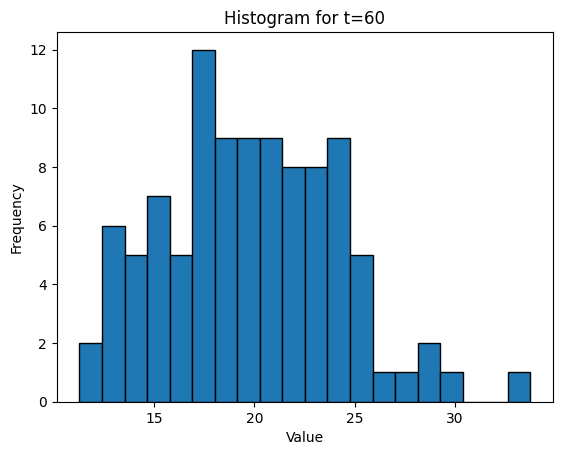

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

# Параметри
k_shape = 0.3
theta_scale = 1.1
n = 100
t_max = 60
rng = np.random.default_rng(42)

def simulate_sum_gamma_t(t, n):
    increments = rng.gamma(shape=k_shape, scale=theta_scale, size=(n, t))
    return increments.sum(axis=1)

# Симуляції для t = 1..60
ts = range(1, t_max + 1)
samples_by_t = {t: simulate_sum_gamma_t(t, n) for t in ts}

# Перевірка нормальності і вивід результатів
for t in [1, 10, 30, 60]:
    sample = samples_by_t[t]
    stat, pval = normaltest(sample)
    print(f"t={t}: mean={np.mean(sample):.3f}, std={np.std(sample, ddof=1):.3f}, p={pval:.3f}")

    plt.hist(sample, bins=20, edgecolor="black")
    plt.title(f"Histogram for t={t}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()


In [5]:
import numpy as np
import pandas as pd



# результати для всіх t
rows = []
for t in range(1, t_max + 1):
    sample = simulate_sum_gamma_t(t, n)
    stat, pval = normaltest(sample)
    mean, std = np.mean(sample), np.std(sample, ddof=1)
    theo_mean = k_shape * t * theta_scale
    theo_std = np.sqrt(k_shape * t) * theta_scale
    rows.append({
        "t": t,
        "mean": round(mean, 3),
        "std": round(std, 3),
        "normaltest_p": round(pval, 3),
        "theoretical_mean": round(theo_mean, 3),
        "theoretical_std": round(theo_std, 3)
    })

df_results = pd.DataFrame(rows)
print(df_results.to_string(index=False))


 t   mean   std  normaltest_p  theoretical_mean  theoretical_std
 1  0.446 0.789         0.000              0.33            0.602
 2  0.731 0.874         0.000              0.66            0.852
 3  0.963 1.133         0.000              0.99            1.044
 4  1.650 1.496         0.000              1.32            1.205
 5  1.779 1.451         0.000              1.65            1.347
 6  1.917 1.139         0.006              1.98            1.476
 7  2.408 1.369         0.033              2.31            1.594
 8  2.514 1.674         0.000              2.64            1.704
 9  3.077 1.819         0.000              2.97            1.807
10  3.034 1.719         0.000              3.30            1.905
11  3.701 2.171         0.000              3.63            1.998
12  4.119 2.267         0.005              3.96            2.087
13  4.282 2.533         0.000              4.29            2.172
14  4.506 2.179         0.003              4.62            2.254
15  4.578 1.925         0

# Висновок


При малих
t
t сума приростів має розподіл, далекий від нормального (через асиметрію гамма-розподілу).

Із ростом
t
t, завдяки Центральній Граничній Теоремі, розподіл суми
S
t
S
t
​
  наближається до нормального.

Теоретичні середні та дисперсії добре узгоджуються з емпіричними результатами симуляцій.



Завдання 2

Завантаж набір даних Product Advertising Data (посилання на диск). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.



Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.

In [12]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Шлях до файлу (залежить куди ти його поклав)
python_material_folder_name = "neo_data/Advertising_Data.csv" #"Advertising Data.csv"




# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True

    import os
    import sys

    # Get the current working directory (notebook's directory)
    notebook_dir = f"{path_python_material}/notebooks"
    print(notebook_dir)

    if notebook_dir not in sys.path:
      sys.path.append(notebook_dir)

except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/MyDrive/neo_data/Advertising_Data.csv/notebooks


In [13]:
# Шлях до файлу (залежить куди ти його поклав)
file_path = "/content/drive/MyDrive/neo_data/Advertising_Data.csv"

# Читаємо CSV
df = pd.read_csv(file_path)

print(df.head())

       TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
0  281.42      538.80      123.94        349.30                242.77   
1  702.97      296.53      558.13        180.55                781.06   
2  313.14      295.94      642.96        505.71                438.91   
3  898.52       61.27      548.73        240.93                278.96   
4  766.52      550.72      651.91        666.33                396.33   

   Affiliate_Marketing  Product_Sold  
0               910.10        7164.0  
1               132.43        5055.0  
2               464.23        6154.0  
3               432.27        5480.0  
4               841.93        9669.0  
